{/* cspell:ignore cryptoquote crypogram WVXRWVW GSZG YVGGVI NZPV GSRH KIVGGB KVLKOV DROO SZEV VZHRVI GRNV HLOERMT  SLKV NZWV HRNKOV carrat URYYP JIGGY EDGRPOJNCUWQZVMK */}

# Quantum key distribution

For this Qiskit in Classrooms module, students must have a working Python environment with the following packages installed:
- `qiskit` v1.3 or newer
- `qiskit-ibm-runtime` v0.29.0 or newer
- `qiskit-aer` v15.0 or newer
- `qiskit.visualization`

To set up and install the packages above, see the [Install Qiskit](/docs/guides/install-qiskit) guide.
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum&reg; by following the steps in the [Set up your IBM Cloud account](/docs/guides/cloud-setup) guide.

This module was tested and used 5 sec. of QPU time. This is a good-faith estimate; your actual usage may vary.

Watch the module walkthrough by Dr. Katie McCormick below, or click [here](https://youtu.be/R0SOqLwLOR0?si=a0AujghPklDN4iBb) to watch it on YouTube.

-------


<IBMVideo id="134413658" title="Katie McCormick explains quantum key distribution, and how it can enable more secure communication."/>

## A brief intro to cryptography

### Simple replacement

There are infinitely many ways of encrypting and decrypting information, and literally thousands of ways have been well-studied. Here, we will restrict ourselves to a very early and very simple method of encryption, called "simple replacement", in order to focus on the quantum part of this protocol. The quantum part could be adapted to many other protocols with relatively few changes.

A simple replacement encryption is one in which one letter or number is replaced with another, such that there is a 1:1 mapping from the letters and numbers in a message, to the letters and numbers being used in an encrypted sequence. A pop-culture instance of these is the cryptoquote or crypogram puzzle, in which a quote or phrase is encrypted using simple replacement, and the player is tasked with decrypting it. These are easy to solve if they are long enough. Consider the example:

R  WVXRWVW  GSZG  R’W  YVGGVI NZPV  GSRH  KIVGGB
OLMT.  GSZG  DZB,  KVLKOV  DROO  SZEV  ZM  VZHRVI
GRNV  HLOERMT  RG.  R  SLKV  R  NZWV  RG  HRNKOV
VMLFTS.

People who solve these by hand mostly use tricks involving familiarity with the structure of the language of the original message. For example, in English, the only one-letter words like the encrypted "R" are "a" and "I". The double letters encrypted in, for example, "KIVGGB" can only take certain values. There are subtler things that give clues like the most common word fitting the "GSZG" pattern is "that". People using code to solve this have many more options, including simply scanning through possibilities until an English word is recovered, and updating while preserving that word. One simple but powerful method is using letter frequency, especially when the message is long enough to constitute a representative sample of English.

### Check-in question

Try your hand at decrypting this if you like, though it is not necessary for the rest of the module. Click the carrat below to see the message.

<details>
<summary>

<b>Answer:</b>

</summary>

I decided that I’d better make this pretty long. That way, people will have an easier time solving it. I hope I made it simple enough.

</details>

The example above is associated with a "key", a mapping from the encrypted to the decrypted letters. In this case, the key is:

- A (not used, let’s call it Z)
- B->Y
- C (not used, let’s call it X)
- D->W
- E->V
- F->U
- ...

And so on. To put it mildly, this is not a good key. Keys in which the encrypted and decrypted letters are simply shifted version of the alphabet (like A->B, B->C, etc.) are called "Caesar shift" ciphers.

Note that these are very difficult if they are short. In fact, if they are very short, they are indeterminate. Consider:

URYYP

There are many possible decryptions, using different keys: HELLO, PETTY, HAPPY, JIGGY, STOOL. Can you think of others?

But if you send many messages like this, eventually, the encryption will be cracked. So, you shouldn’t use the same “key” too often. In fact, best is if you use a certain substitution only once. Not in only one message, but *only for one single character!* By this, we mean you’ll have an encryption scheme or key for each character used in the message, in order. If you want to send a message to a friend using this message, you and your friend would need a pad a paper (in ye olden times) on which this ever-changing key is written. You will use this only once. This is called a “one-time pad”.

### The one-time pad

Let’s see how this works with an example. One could do this entirely with letters, but it is common to convert from letters to numbers, say, by assigning A=0, B=1, C=2….
Suppose we are friends involved in clandestine activities and we have shared a pad. Ideally, we would share many pads, but today’s is:

EDGRPOJNCUWQZVMK…

Or, converting to numbers by placement in the alphabet:

4,3,6,17,15, 14, 9, 13, 2, 20, 22, 16, 25, 21, 12, 10…

Let us suppose, I want to share with you, the message:

“I love quantum!”

Or, equivalently:

8, 11, 14, 21, 4, 16, 20, 0, 13, 19, 20, 12

We don’t want to send the above code; that is a simple substitution, which is not at all secure. We want to combine this with our key in some way. A common way is addition modulo 26. We add the value of the message to the value of the key, mod 26, until we reach the end of the message. So, we would send

8+4 (mod 26) = 12, 11+3 (mod 26) = 14, 14+6 (mod 26) = 20, 21+17 (mod 26) = 12…

= 12, 14, 20, 12, 19, 4, 3, 13, 15, 13, 16, 2

Note that if someone intercepts this and does NOT have the key, decrypting it is utterly hopeless! Not even the two “u”s in "quantum" are encoded with the same number! The first is a 3, and the second is a 16… in the same word!

So, I send this to you, and you have the same key I do. You undo the addition modulo 26 which you know I carried out:

12, 14, 20, 12, 19, 4, 3, 13, 15, 13, 16, 2

=(4+x1) (mod 26), (3+x2) (mod 26), (6+x3) (mod 26), (17+x4) (mod 26),…

Such that the message x1, x2, x3, x4… must be

8, 11, 14, 21…

Finally, converting this to text, we have

“I love quantum”.

This is a one-time pad.

Note that if the key is shorter than the message, we start to repeat our encoding. That would still be a hard decryption problem to solve, but not impossible if it is repeated enough times. So, you need a long key (or “pad”).

<Admonition type="note">

In many contexts, students will already be familiar with this encryption, such that this activity can be skipped. But it is a relatively quick, simple refresher.

Step 1: Get a partner, and share a sequence of 4 letters to use as a key. Any class-appropriate 4-letter sequence will do. \
Step 2: Select a 4-letter secret word you want to send to your partner (both partners do this so you send each other different secret words) \
Step 3: Convert the 4-letter key/pad and each of the 4-letter secret words to numbers using A = 1, B = 2, etc. \
Step 4: Combine your 4-letter word with the one-time pad using modulo 26 addition. \
Step 5: Hand your partner the sequence of numbers encoding your secret word, and your partner will hand you theirs. \
Step 6: Decode each other’s words using modulo 26 subtraction. \
Step 7: Verify. Did it work?

#### Follow-up

Swap encrypted words with a different group, that does not have access to your one-time pad. Can you decrypt it? Explain why or why not?

</Admonition>

Hopefully the activity above makes it clear that a one-time pad is an unbreakable form of encryption, given a few assumptions, like:
- The key is the same length as the message being sent, or longer
- The key is truly random
- The key is used only once and then discarded

So this is great. We have unbreakable encryption... unless someone gets our key. If someone gets our key, everything is decrypted. This difference between unbreakable encryption and having all our secrets exposed makes the sharing of a secure key extremely important. The goal of quantum key distribution is to leverage constraints that nature has imposed on quantum information to secure a shared key/one-time pad.

## Using quantum states as a key

Let's assume we are working with qubits (emphasizing that qubits have two eigenstates). One could use quantum systems with higher numbers of quantum states, but the state-of-the-art quantum computers at IBM&reg; use qubits. It’s no problem to encode our A, B, C, into sequences of 0’s and 1’s. So, it is sufficient for us to share a key of 0’s and 1’s and do addition modulo 2 on each bit storing a letter.

#### Check your understanding
Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
<summary>

If we really only care about English letters, how many bits do we need?

</summary>

__Answer:__

$$
2^4=16\\
2^5 = 32 \rightarrow 5 \text{ bits}
$$

</details>


Our friends, Alice and Bob would like to share a quantum key in such a way that no one else can intercept it (at least not without them knowing). They need to have a way of sending quantum states to each other. Doing this with high fidelity and no noise/errors is NOT trivial. But there are two approaches tha we should be able to understand at this point:
1. A fiber-optic cable allows you to send light… which is very quantum-mechanical. Single photons can be detected with high fidelity over many kilometers of fiber optic cable. This is not a perfect, error-free quantum channel, but it could be very good.
2. We could use quantum teleportation, as described in a previous module. That is, Alice and Bob could share entangled qubits and a state could be sent from Alice to Bob using the teleportation protocol.

For this module, we don't want to require you to have high-fidelity optic setups for sharing photons, so we will use the second method for sharing quantum states. But this is not to say that it is the most realistic for long-distance sharing of quantum keys.

We will now explore a protocol first laid out by [Charles Bennett and Gilles Brassard in 1984](https://www.sciencedirect.com/science/article/pii/S0304397514004241?via%3Dihub) for sharing states measured in different bases from Alice to Bob. We will use a clever measurement regimen to build up a key for use in later encryption. In other words, we are distributing a quantum key between two parties who wish to communicate, hence "quantum key distribution" (QKD).

### QKD step 1: Alice's random bits and random bases

Alice will start out by generating a random sequence of 0's and 1's. She will then randomly select a basis in which to prepare a quantum state, based on each random bit, using the table below (a table that Bob also has):

| Basis   | bit = 0         | bit = 1        |
|---------|----------------|----------------|
| Z       | $\vert 0\rangle$      | $\vert 1\rangle$   |
| X       | $\vert +\rangle$  | $\vert -\rangle$   |

For example, let us suppose Alice randomly generated a 0, and randomly selected the X basis. Then she would prepare a quantum state $|\psi\rangle = |+\rangle_x = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. One can certainly leverage quantum randomness to generate a random set of 0's and 1's, and a random basis choice. For now, let's simply assume a random set has been generated, as follows:

| Alice's bits   | 0       | 1       | 0       | 0       | 1       | 1       | 0       | 1       | 0       | ... |
|---------|----------|--------|---------|----------|--------|---------|----------|--------|--------|---|
| Alice's bases      | X       | X       | Z       | Z       | Z       | X       | Z       | Z       | X       | ...|
| Alice's states       | $\vert +\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert +\rangle$ |...|

This set of random bits, bases, and resulting states would continue in a long sequence, to give a key of sufficient length.

### QKD step 2: Bob's random bases

Bob also makes a random choice of bases. However, whereas Alice was using the basis choice to prepare her state, Bob will actually make measurements in these bases. If Bob makes a measurement in the same basis in which Alice prepared the the state, then we can predict the outcome of Bob's measurement. When Bob happens to pick a different basis from the basis Alice used in preparation, we cannot know the outcome of Bob's measurement.

| Alice's bits   | 0       | 1       | 0       | 0       | 1       | 1       | 0       | 1       | 0       | ... |
|---------|----------|--------|---------|----------|--------|---------|----------|--------|--------|---|
| Alice's bases      | X       | X       | Z       | Z       | Z       | X       | Z       | Z       | X       | ...|
| Alice's states       | $\vert +\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert +\rangle$ |...|
| Bob's bases      | X       | Z       | X       | Z       | X       | X       | Z       | X       | X       | ...|
| Bob's states (a priori)       | $\vert +\rangle$ | ? | ? | $\vert 0\rangle$ | ? | $\vert -\rangle$ | $\vert 0\rangle$ | ? | $\vert +\rangle$ |...|
| Bob's states (measured)       | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ |...|

In the table below, consider the first column. Alice has prepared the state $\vert +\rangle,$ which is an eigenstate of X. Since Bob has also randomly chosen to measure in the X basis, there is only one possible outcome for Bob's measured state: $\vert +\rangle.$ In the second column, however, they have chosen different bases. The state Alice sent is $\vert -\rangle = \frac{1}{\sqrt{2}}(\vert 0\rangle-\vert 1 \rangle).$ This has a 50% chance of being measured by Bob in the $\vert 0\rangle$ state, and a 50% chance of being measured in $\vert 1\rangle.$ So the row showing what we know, a priori, about Bob's measurements cannot be filled in for column 2. But Bob will make a measurement and obtain an eigenstate of (in that column) Z. In the bottom row, we fill in what these measurements happened to yield.

### QKD step 3: Public discussion of bases

Alice and Bob can now share with each other what basis they chose in each case. For all the columns in which they happened to choose the same basis, they each know for certain what state the other had. Bob can convert the state and basis to a 0 or 1 according to the convention shared by both parties. We can rewrite the table above to show only the instances where Alice's and Bob's bases matched:

| Alice's bits   | 0       | 0       | 1       | 0       |  0       | ... |
|---------|----------|----------|---------|----------|--------|---|
| Alice's bases      | X       | Z       | X       | Z       |  X       | ...|
| Alice's states       | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ |...|
| Bob's bases      | X       | Z       | X       | Z       | X       | X       | ...|
| Bob's states (a priori)       | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ |...|
| Bob's states (measured)       | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ |...|
| Bob's bits       | 0 | 0 | 1 | 0 | 0 |...|

Alice has successfully transmitted the bit string 00100... to Bob. If the friends agreed ahead of time to use 5-bit strings as numbers in their one-time pad, these first five bits would give them the number $4 = 0\times2^4+0\times2^3+1\times2^2+0\times2^1+0\times2^0.$

### QKD step 4: Verify and send secret

Before Alice and Bob go any further, they should choose a subset of their classical bits to compare. Since they have only kept measurements of qubits which were prepared and measured using the same basis, all the measured values should agree. If there were a very small percentage that did not agree, this could be attributable to quantum noise or errors. But if many do not agree, something has gone wrong!

Here we will not address what fraction of the key should be used for verification. For now, we will assume that this check goes well; we will revisit this in the section below on eavesdropping.

The friends would then send an encrypted message to each other using classical channels. The would then use the numbers in their one-time pad to encrypt/decrypt secret messages, without ever transmitting the one-time pad from one location to another. For the next section on eavesdropping, please keep in mind that all this sharing of the key happens prior to the revelation of the encrypted secret via classical channels.

Alice and Bob communicated their basis of choice via classical channels, so couldn't that be intercepted? Yes! But knowing the basis they used for measurement does not tell you what bit they sent or obtained. That is only possible if you also know Alice's starting bits. But then you would be in Alice's computer, where the secrets are stored, and secret communication of the secrets becomes moot. So interception of the classical communication does not break the encryption. But what about intercepting information in the quantum channel?

## Resistance of QKD to eavesdropping

Alice and Bob have a friend Eve, who is notorious for eavesdropping. Eve wishes to intercept Alice's and Bob's quantum key, so that she may use it to decrypt messages sent between the two. This would necessarily happen between Alice's preparation of the states and Bob's measurement of the states, since the measurement collapses the quantum state. In particular, this means the eavesdropping would have to occur *before* there has been any sharing or comparison of bases.

Eve must guess which base was used in encoding each bit. Again, if she is not able to access Alice's computer, she has nothing on which to base this guess, and it will be random. Let us assume Alice's start is the same as before, and let us further assume that Bob's random choice of measurement basis is the same as before. Let's fill in what Eve obtains if she makes measurements of the quantum channel. As before, if Eve happens to choose the same basis as Alice, we know what she will obtain. If not, she could obtain either of two outcomes, each with a 50% probability.

| Alice's bits   | 0       | 1       | 0       | 0       | 1       | 1       | 0       | 1       | 0       | ... |
|---------|----------|--------|---------|----------|--------|---------|----------|--------|--------|---|
| Alice's bases      | X       | X       | Z       | Z       | Z       | X       | Z       | Z       | X       | ...|
| Alice's states       | $\vert +\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert +\rangle$ |...|
| Eve's guess bases      | Z       | X       | X       | Z       | X       | Z       | Z       | X       | X       | ...|
| Eve's states (a priori)      | ? | $\vert -\rangle$ | ? | $\vert 0\rangle$ | ? | ? | $\vert 0\rangle$ | ? | $\vert +\rangle$ |...|
| Eve's states (measured)      | $\vert 1\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ |...|
| Bob's bases      | X       | Z       | X       | Z       | X       | X       | Z       | X       | X       | ...|

Now because Eve has no idea whether she matched Alice's basis or not, she does not know what to transmit on to Bob to match Alice's original states. When Eve measures, for example, $|0\rangle,$ all she knows for certain is that Alice did *not* prepare the state $|1\rangle$ for that qubit. But Alice could have prepared $|0\rangle,$ $|+\rangle,$ or $|-\rangle.$ All could be consistent with Eve's measurement. So Eve must make a choice. She might send on exactly the state she measured, or she might try to guess instances in which her measurement was not the eigenstate sent by Alice. We will include a mixture in our table:

| Alice's bits   | 0       | 1       | 0       | 0       | 1       | 1       | 0       | 1       | 0       | ... |
|---------|----------|--------|---------|----------|--------|---------|----------|--------|--------|---|
| Alice's bases      | X       | X       | Z       | Z       | Z       | X       | Z       | Z       | X       | ...|
| Alice's states       | $\vert +\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert +\rangle$ |...|
| Eve's guess bases      | Z       | X       | X       | Z       | X       | Z       | Z       | X       | X       | ...|
| Eve's states (a priori)      | ? | $\vert -\rangle$ | ? | $\vert 0\rangle$ | ? | ? | $\vert 0\rangle$ | ? | $\vert +\rangle$ |...|
| Eve's states (measured)      | $\vert 1\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ |...|
| Eve's states (sent on)      | $\vert 1\rangle$ | $\vert 0\rangle$ | $\vert 1\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert 0\rangle$ |...|
| Bob's bases      | X       | Z       | X       | Z       | X       | X       | Z       | X       | X       | ...|
| Bob's states (a priori)      | ? | $\vert 0\rangle$ | ? | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ |...|
| Bob's states (measured)      | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert -\rangle$ | $\vert +\rangle$ |...|
| Bob's bits   | 1       | 0       | 0       | 0       | 1       | 0       | 0       | 1       | 0       | ... |

At this point, it is reasonable to ask, "Why doesn't Eve just make a copy of Alice's quantum state, keep one to measure, and transmit the other on to Bob?" The answer is the ["no-cloning" theorem](https://en.wikipedia.org/wiki/No-cloning_theorem). Informally, it says that there is no unitary (quantum mechanical) operation that can make a second copy of an arbitrary quantum state, while preserving the first copy. The proof is relatively simple, and is left as a guided exercise. But for now, understand that Eve making copies of the quantum state is forbidden by fundamental laws of nature, and this is a principle strength of QKD.

As before, Alice and Bob would call each other and compare bases. They will reduce this table to the cases where the two friends selected the same bases:

| Alice's bits   | 0       | 0       | 1       | 0       | 0       | ... |
|---------|----------|----------|---------|----------|--------|---|
| Alice's bases      | X       | Z       | X       | Z       | X       | ...|
| Alice's states       | $\vert +\rangle$ | $\vert 0\rangle$ |  $\vert -\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ |...|
| Eve's guess bases      | Z       | Z       | Z       | Z       | X       | ...|
| Eve's states (a priori)      | ? | $\vert 0\rangle$ | ? | $\vert 0\rangle$ | $\vert +\rangle$ |...|
| Eve's states (measured)      | $\vert 1\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ |...|
| Eve's states (sent on)      | $\vert 1\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert 0\rangle$ |...|
| Bob's bases      | X       | Z       | X       | Z       | X       | ...|
| Bob's states (a priori)      | ? | $\vert 0\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ |...|
| Bob's states (measured)      | $\vert -\rangle$ | $\vert 0\rangle$ | $\vert +\rangle$ | $\vert 0\rangle$  | $\vert +\rangle$ |...|
| Bob's bits   | 1    |    0       | 0       | 0       | 0       | ... |

Alice and Bob have once again communicated a bit string... but the strings don't match. The far left and middle bits are flipped. Looking at the previous table, you can trace this mismatch to the interference from Eve. Critically, note that we can do statistics on the match between our bitstrings now, while setting up the key, long before sharing our encrypted secret. Alice and Bob are free to use as many of their one-time pad bits as they like to check the security of their channel. If a single bit, or a very small percentage of bits did not match, this might be attributable to noise or errors. But a substantial fraction of mismatches indicates eavesdropping. The meaning of "substantial" here depends a bit on the noise in the setup being used; what is means for IBM quantum computers is discussed below when we implement this protocol. If excess errors are detected, Alice and Bob do not share the secret, and they can begin hunting the eavesdropper.

### Caveats

Proving security is extremely difficult. In fact the protocol loosely described here was proposed in 1984, and wasn't proved secure until 16 years later [Shor & Preskill, 2000](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.85.441). There are many subtleties that are beyond the scope of this introduction. But we will briefly list a few to demonstrate that the topic is more complex than illustrated here.
* __Secure channels:__ When Alice sends her qubits through some quantum setup (a channel), and in particular when she hears classical responses back from someone, we have assumed that the someone is actually Bob. If Eve infiltrated this setup in such a way that __all__ Alice's communication was actually happening with Eve, and __all__ Bob's communication was actually being done with Eve, then Eve has effectively obtained a key, and can learn secrets. One must first ensure "secure channels", a process with a different set of protocols that we have not addressed here.
* __Assumptions about Eve:__ To truly prove security, we can't make assumptions about Eve's behavior; she could always confound our expectations. Here, to give concrete examples, we are making assumptions. For example, we might assume that the states Eve sends on to Bob are always exactly those she obtained upon measurement. Or we might assume that she randomly chooses a state experimentally consistent with her measurement. More fundamentally, the language here assumes that Eve actually makes a measurement, as opposed to storing the state on another quantum system and sending on a random qubit to Bob. These assumptions are fine to understand the protocol, but they do mean we are not proving anything in full generality.
* __Privacy amplification:__ Alice and Bob are not required to use the quantum key exactly as transmitted. They can, for example, apply a hash function to the shared key. This would exploit the fact that the eavesdropper has incomplete knowledge of the key to produce a shorter, but secure, shared key.

## Experiment 1: QKD with no eavesdropper

Let us implement the above protocol in the absence of an eavesdropper. We will do this first using a simulator, simply to understand the workflow.

First, a note on quantum simulators: Most quantum problems involving more than ~30 qubits cannot be simulated by most computers. No classical computer, supercomputer or GPU can simulate the full range of behavior of a 127-qubit quantum computer. Usually, the motivation for using real quantum computers is that the many entangled qubits cannot be simulated. In this case, there is no entanglement of qubits, unless we use the teleportation scheme to move information. In this case, the motivation for using real quantum computers is different: it is the no-cloning theorem. A classical computer simulating a qubit could send information about a quantum state from Alice to Bob, but if this classical information were intercepted, it could easily be duplicated, and Eve could keep a perfect copy, while sending another to Bob. This is not possible with real quantum states.

IBM Quantum recommends tackling quantum computing problems using a framework we call "Qiskit patterns". It consists of the following steps.
- Step 1: Map your problem to a quantum circuit
- Step 2: Optimize your circuit for running on real quantum hardware
- Step 3: Execute your job on IBM quantum computers using Runtime primitives
- Step 4: Post-process the results

### Qiskit patterns step 1: Map your problem to a quantum circuit

In this case, the mapping of our problem to quantum circuits reduces to simply preparing Alice's states, and then including Bob's measurements. We start with the random bit and random basis selection.

In [1]:
# Qiskit patterns step 1: Map your problem to quantum circuit
# Import some generic packages

import numpy as np
from qiskit import QuantumCircuit

# Set up a random number generator and a quantum circuit. We choose to start with 20 bits, though any number <30 should be fine.

rng = np.random.default_rng()
bit_num = 20
qc = QuantumCircuit(bit_num, bit_num)

# QKD step 1: Random bits and bases for Alice
# generate Alice's random bits

abits = np.round(rng.random(bit_num))

# generate Alice's random measurement bases. Here we will associate a "0" with the Z basis, and a "1" with the X basis.

abase = np.round(rng.random(bit_num))

# Alice's state preparation. Check that this creates states according to table 1

for n in range(bit_num):
    if abits[n] == 0:
        if abase[n] == 1:
            qc.h(n)
    if abits[n] == 1:
        if abase[n] == 0:
            qc.x(n)
        if abase[n] == 1:
            qc.x(n)
            qc.h(n)

qc.barrier()

# QKD step 2: Random bases for Bob
# generate Bob's random measurement bases.

bbase = np.round(rng.random(bit_num))

# Note that if Bob measures in Z no gates are necessary, since IBM Quantum computers measure in Z by default.
# If Bob measures in the X basis, we implement a hadamard gate qc.h to facilitate the measurement.

for m in range(bit_num):
    if bbase[m] == 1:
        qc.h(m)
    qc.measure(m, m)

Let's visualize the bits, bases, and circuit. Note that sometimes the bases match, and sometimes they do not.

Alice's bits are  [1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
Alice's bases are  [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.]
Bob's bases are  [0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.]


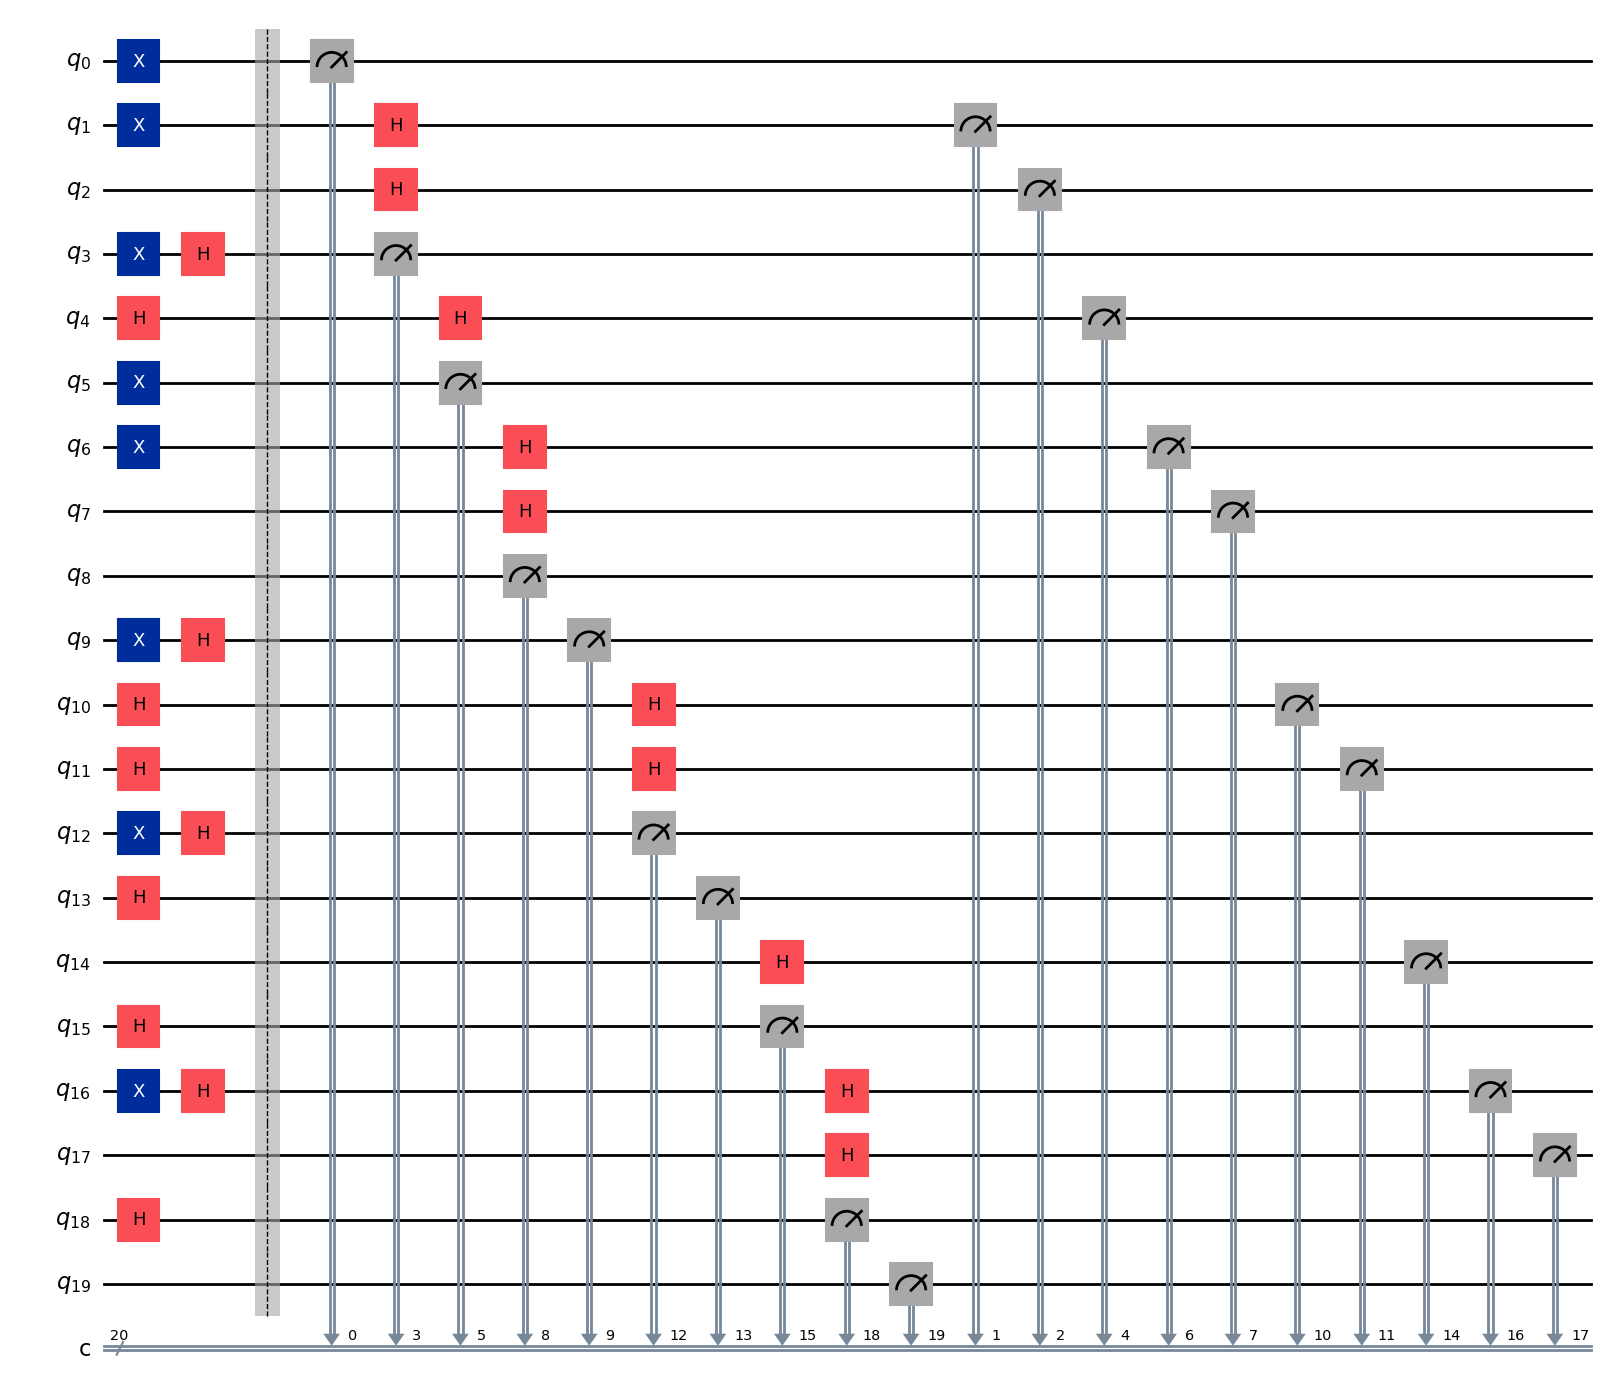

In [2]:
print("Alice's bits are ", abits)
print("Alice's bases are ", abase)
print("Bob's bases are ", bbase)
qc.draw("mpl")

### Qiskit patterns step 2: Optimize problem for quantum execution

This step takes the operations we want to perform and expresses them in terms of the functionality of a specific quantum computer. It also maps our problem onto the layout of the quantum computer.

We will start by loading several packages that are required to communicate with IBM quantum computers. We must also select a backend on which to run. We can either choose the least busy backend, or select a specific backend whose properties we know. Although we will momentarily use a simulator, it is important to use a reasonable noise model in simulation, and it is good to keep the workflow as close as possible to what we will use later for real quantum computers.

In [3]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService()
service = QiskitRuntimeService(channel="ibm_quantum_platform")

# Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)
backend = service.backend("ibm_brisbane")
print(backend.name)

ibm_brisbane


Below we select a simulator and noise model.

In [4]:
# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Load the qiskit runtime sampler
from qiskit_ibm_runtime import SamplerV2 as Sampler


noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend=backend_sim)

In [5]:
# Qiskit patterns step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

### Qiskit patterns step 3: Execute

Use the sampler to run your job, with the circuit as an argument.

In [6]:
# This required 5 s to run on ibm_torino on 10-28-24
sampler = Sampler(mode=backend)
job = sampler.run([qc_isa], shots=1)
# job = sampler_sim.run([qc], shots = 1)
counts = job.result()[0].data.c.get_counts()
countsint = job.result()[0].data.c.get_int_counts()

### Qiskit patterns step 4: Post-processing

Here we interpret our results and extract useful information. We might try visualizing the output of our sampler, but we have used sampler in an unconventional way. Rather than making many measurements of our circuit and developing statistics on the states, we have made only one measurement (Bob's). Any qubit with a state that was prepared and measured in the same basis should have a deterministic outcome, such that only one measurement is necessary. Those qubits with states prepared and measured in different bases (which would have probabilistic outcomes and would require many measurements to interpret) will not be used to build up our one-time pad/key.

Let us extract a list of measurement outcomes from this bitstring. Take care to reverse the order if comparing with Alice's bit array we used to generate the circuit.

In [7]:
# Get an array of bits

keys = counts.keys()
key = list(keys)[0]
bmeas = list(key)
bmeas_ints = []
for n in range(bit_num):
    bmeas_ints.append(int(bmeas[n]))

# Reverse the order to match our input. See "little endian" notation.

bbits = bmeas_ints[::-1]

print(bbits)

[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]


Let's compare the measurement bases randomly chosen by Alice and Bob. This was step 3 in our QKD protocol (public discussion of bases). Any time they chose the same basis for a qubit, we add the bits associated with that qubit to a list of bits for generating numbers in a one-time pad. When the bases do not match, the results are thrown out. Let us also check to see the two lists of bits agree, or if there were any losses due to noise or other factors.

In [8]:
# QKD step 3: Public discussion of bases

agoodbits = []
bgoodbits = []
match_count = 0
for n in range(bit_num):
    # Check whether bases matched.
    if abase[n] == bbase[n]:
        agoodbits.append(int(abits[n]))
        bgoodbits.append(bbits[n])
        # If bits match when bases matched, increase count of matching bits
        if int(abits[n]) == bbits[n]:
            match_count += 1

print(agoodbits)
print(bgoodbits)
print("fidelity = ", match_count / len(agoodbits))
print("loss = ", 1 - match_count / len(agoodbits))

[1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 0]
fidelity =  1.0
loss =  0.0


Alice and Bob each have a list of bits, and they match with 100% fidelity. They can use these to generate numbers in a one-time pad. They can then use this in QKD step 4: sending and decrypting a secret. The present array of bits is too short to decrypt much of anything. We will return to this after including eavesdropping.

#### Check your understanding
Read the question below, think about your answer, then click the triangle to reveal the solution.

<details>
<summary>

Assume you need digits large enough to facilitate shifting letters in the English alphabet by that alphabet's full length, or more, although there are certainly other encoding schemes.
(a) How many letters long could a message be for it to be decrypted using the bits in the key above? (b) Must your answer agree with your classmates'? Why or why not?

</summary>

__Answer:__

(a) The answer depends on how many randomly-chosen bases matched between Alice and Bob. Since there is roughly a 50-50 chance of the bases matching for any given qubit, we expect close to 10 of our bits to be useful. 9 or 11 will be perfectly common. Even 4 or 15 are not outside the realm of possibility. 5 bits are required to shift by a number greater than or equal to the length of the English alphabet, meaning you can apply the shift to one letter for every 5 bits you have. If you have at least 5 bits shared by Alice and Bob, you can encode a single letter. If you have at least 10, you can enocde 2 letters, and so on. (b) It need not agree, for the reasons outlined in (a).

</details>

## Experiment 2: QKD with an eavesdropper

We will implement exactly the same protocol as before. This time, we will insert another set of measurements, by Eve, between Alice and Bob.

In [9]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister

# Qiskit patterns step 1: Mapping your problem to a quantum circuit
# QKD step 1: Random bits and bases for Alice

bit_num = 20
qr = QuantumRegister(bit_num, "q")
cr = ClassicalRegister(bit_num, "c")
qc = QuantumCircuit(qr, cr)

# Alice's random bits and bases, as before

abits = np.round(rng.random(bit_num))
abase = np.round(rng.random(bit_num))

# Alice's state preparation, as before

for n in range(bit_num):
    if abits[n] == 0:
        if abase[n] == 1:
            qc.h(n)
    if abits[n] == 1:
        if abase[n] == 0:
            qc.x(n)
        if abase[n] == 1:
            qc.x(n)
            qc.h(n)

qc.barrier()

# Eavesdropping happens here!
# Generate Eve's random measurement bases

ebase = np.round(rng.random(bit_num))

for m in range(bit_num):
    if ebase[m] == 1:
        qc.h(m)
    qc.measure(qr[m], cr[m])

In [10]:
# Qiskit patterns step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

In [11]:
# Qiskit patterns step 3: Execute
job = sampler_sim.run([qc_isa], shots=1)
counts = job.result()[0].data.c.get_counts()
countsint = job.result()[0].data.c.get_int_counts()

Qiskit patterns step 4 (post-processing) is simple in this case. There is no need to visualize the distribution of measurements, since we made only one measurement. Eve has the following bits:

In [12]:
keys = counts.keys()
key = list(keys)[0]
emeas = list(key)
emeas_ints = []
for n in range(bit_num):
    emeas_ints.append(int(emeas[n]))
ebits = emeas_ints[::-1]

print(ebits)

[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]


Now Eve must reconstruct states to send on to Bob. A described in the introduction, she has no way of knowing if she guessed the encoding bases correctly, so she is not able to prepare exactly the same states that were sent. She could assume every basis choice was correct and encode exactly what she measured, or she could assume she chose the basis incorrectly and choose either eigenstate of the opposite basis. Here, we assume the former, for simplicity. We accomplish this by constructing a whole new quantum circuit, repeating Qiskit patterns steps as before.

In [13]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Qiskit patterns step 1: Mapping your problem onto a quantum circuit
# QKD step 1: Eve uses her measurements to prepare best guess states to send on to Bob

qr = QuantumRegister(bit_num, "q")
cr = ClassicalRegister(bit_num, "c")
qc = QuantumCircuit(qr, cr)

# Eve's state preparation

for n in range(bit_num):
    if ebits[n] == 0:
        if ebase[n] == 1:
            qc.h(n)
    if ebits[n] == 1:
        if ebase[n] == 0:
            qc.x(n)
        if ebase[n] == 1:
            qc.x(n)
            qc.h(n)

qc.barrier()

# QKD step 2: Random bases for Bob

bbase = np.round(rng.random(bit_num))

for m in range(bit_num):
    if bbase[m] == 1:
        qc.h(m)
    qc.measure(qr[m], cr[m])

# Qiskit patterns step 2: Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)


# Qiskit patterns step 3: Execute

job = sampler_sim.run([qc_isa], shots=1)
counts = job.result()[0].data.c.get_counts()
countsint = job.result()[0].data.c.get_int_counts()

# Qiskit patterns step 4: Post-processing

keys = counts.keys()
key = list(keys)[0]
bmeas = list(key)
bmeas_ints = []
for n in range(bit_num):
    bmeas_ints.append(int(bmeas[n]))
bbits = bmeas_ints[::-1]

print(bbits)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1]


Let us now compare Alice's and Bob's bits:

In [14]:
agoodbits = []
bgoodbits = []
match_count = 0
for n in range(bit_num):
    if abase[n] == bbase[n]:
        agoodbits.append(int(abits[n]))
        bgoodbits.append(bbits[n])
        if int(abits[n]) == bbits[n]:
            match_count += 1
print(agoodbits)
print(bgoodbits)
print("fidelity = ", match_count / len(agoodbits))
print("loss = ", 1 - match_count / len(agoodbits))

[1, 1, 0, 0, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 1]
fidelity =  0.8571428571428571
loss =  0.1428571428571429


Previously, there was a perfect match between the bits in Alice's and Bob's keys. Now, from Eve's interference, we see the bits of Alice and Bob are different in 14% of cases that should match due to Alice and Bob selecting the same bases. This should be easy for Alice and Bob to detect. However, relying on a percentage of errors like this does mean that there is a limit to how much noise we can tolerate in the quantum channel.

## Experiment 3: Compare QKD with and without eavesdropping on a real quantum computer

Let's run this on a real quantum computer. That way we can leverage the no-cloning theorem. At the same time, real quantum computers have noise, and have higher error rates than classical computers. So let's compare loss in fidelity of our key bits with and without eavesdropping, to make sure the difference is detectable when using a real quantum comptuter. We'll start in the absence of eavesdropping:

In [15]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# This calculation was run on ibm_sherbrooke on 11-7-24 and required 3 s to run, with 127 qubits.
# Qiskit patterns step 1: Mapping your problem to a quantum circuit

bit_num = 127
qc = QuantumCircuit(bit_num, bit_num)

# QKD step 1: Generate Alice's random bits and bases

abits = np.round(rng.random(bit_num))
abase = np.round(rng.random(bit_num))

# Alice's state preparation

for n in range(bit_num):
    if abits[n] == 0:
        if abase[n] == 1:
            qc.h(n)
    if abits[n] == 1:
        if abase[n] == 0:
            qc.x(n)
        if abase[n] == 1:
            qc.x(n)
            qc.h(n)

# QKD step 2: Random bases for Bob

bbase = np.round(rng.random(bit_num))

for m in range(bit_num):
    if bbase[m] == 1:
        qc.h(m)
    qc.measure(m, m)


# Qiskit patterns step 2: Transpilation

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

# Load the Runtime primitive and session
sampler = Sampler(mode=backend)

# Qiskit patterns step 3: Execute

job = sampler.run([qc_isa], shots=1)
counts = job.result()[0].data.c.get_counts()
countsint = job.result()[0].data.c.get_int_counts()

# Qiskit patterns step 4: Post-processing
# Extract Bob's bits

keys = counts.keys()
key = list(keys)[0]
bmeas = list(key)
bmeas_ints = []
for n in range(bit_num):
    bmeas_ints.append(int(bmeas[n]))
bbits = bmeas_ints[::-1]

# Compare Alice's and Bob's measurement bases and collect usable bits

agoodbits = []
bgoodbits = []
match_count = 0
for n in range(bit_num):
    if abase[n] == bbase[n]:
        agoodbits.append(int(abits[n]))
        bgoodbits.append(bbits[n])
        if int(abits[n]) == bbits[n]:
            match_count += 1

# Print some results

print("Alice's bits = ", agoodbits)
print("Bob's bits = ", bgoodbits)
print("fidelity = ", match_count / len(agoodbits))
print("loss = ", 1 - match_count / len(agoodbits))

Alice's bits =  [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
Bob's bits =  [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
fidelity =  0.9682539682539683
loss =  0.031746031746031744


With no eavesdropping, we obtained 100% fidelity over this set of 127 trial bits, resulting in 55 matched bases and usable key bits.
Now let's repeat this experiment with Eve listening in:

In [16]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# This calculation was run on ibm_nazca on 11-7-24 and required 2 s to run, with 127 qubits.
# Qiskit patterns step 1: Mapping your problem to a quantum circuit

bit_num = 127
qr = QuantumRegister(bit_num, "q")
cr = ClassicalRegister(bit_num, "c")
qc = QuantumCircuit(qr, cr)

# QKD step 1: Generate Alice's random bits and bases

abits = np.round(rng.random(bit_num))
abase = np.round(rng.random(bit_num))

# Alice's state preparation

for n in range(bit_num):
    if abits[n] == 0:
        if abase[n] == 1:
            qc.h(n)
    if abits[n] == 1:
        if abase[n] == 0:
            qc.x(n)
        if abase[n] == 1:
            qc.x(n)
            qc.h(n)


# Eavesdropping happens here!
# Generate Eve's random measurement bases

ebase = np.round(rng.random(bit_num))

for m in range(bit_num):
    if ebase[m] == 1:
        qc.h(m)
    qc.measure(qr[m], cr[m])

# Qiskit patterns step 2: Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

sampler = Sampler(mode=backend)

# Qiskit patterns step 3: Execute

job = sampler.run([qc_isa], shots=1)
counts = job.result()[0].data.c.get_counts()
countsint = job.result()[0].data.c.get_int_counts()

# Qiskit patterns step 4: Post-processing
# Extract Eve's bits

keys = counts.keys()
key = list(keys)[0]
emeas = list(key)
emeas_ints = []
for n in range(bit_num):
    emeas_ints.append(int(emeas[n]))
ebits = emeas_ints[::-1]

# print(ebits)

# Restart process
# Qiskit patterns step 1: Mapping your problem to a quantum circuit

# QKD step 1: Eve uses her measurements above to prepare best guess states to send on to Bob

qr = QuantumRegister(bit_num, "q")
cr = ClassicalRegister(bit_num, "c")
qc = QuantumCircuit(qr, cr)


# Eve's state preparation

for n in range(bit_num):
    if ebits[n] == 0:
        if ebase[n] == 1:
            qc.h(n)
    if ebits[n] == 1:
        if ebase[n] == 0:
            qc.x(n)
        if ebase[n] == 1:
            qc.x(n)
            qc.h(n)

# QKD step 2: Random bases for Bob

bbase = np.round(rng.random(bit_num))

for m in range(bit_num):
    if bbase[m] == 1:
        qc.h(m)
    qc.measure(qr[m], cr[m])

# Qiskit patterns step 2: Transpile

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

# Qiskit patterns step 3: Execute

job = sampler.run([qc_isa], shots=1)
counts = job.result()[0].data.c.get_counts()
countsint = job.result()[0].data.c.get_int_counts()

# Qiskit Patterns step 4: Post-processing
# Extract Bob's bits

keys = counts.keys()
key = list(keys)[0]
bmeas = list(key)
bmeas_ints = []
for n in range(bit_num):
    bmeas_ints.append(int(bmeas[n]))
bbits = bmeas_ints[::-1]

# Compare Alice's and Bob's bases, when they are the same, keep the bits.

agoodbits = []
bgoodbits = []
match_count = 0
for n in range(bit_num):
    if abase[n] == bbase[n]:
        agoodbits.append(int(abits[n]))
        bgoodbits.append(bbits[n])
        if int(abits[n]) == bbits[n]:
            match_count += 1

# Print some results

print("Alice's bits = ", agoodbits)
print("Bob's bits = ", bgoodbits)
print("fidelity = ", match_count / len(agoodbits))
print("loss = ", 1 - match_count / len(agoodbits))

Alice's bits =  [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1]
Bob's bits =  [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]
fidelity =  0.7619047619047619
loss =  0.23809523809523814


Here we found almost 23% loss of fidelity in shared bits due to eavesdropping! This is very detectable! Note that transferring quantum information over long distances could still introduce additional noise and errors. Assuring that eavesdropping can be detected, even in the presence of noise, and even when Eve uses all tricks at her disposal is a complex field beyond this introduction.

## Review and questions

### Critical concepts

- Quantum information cannot be copied or "cloned".
- You *can* repeat the same preparation process to make an ensemble of quantum states which are all the same, or nearly the same.
- An encryption/decryption key (a one-time pad) can be shared between two friends using quantum states.
- Two friends randomly choosing a measurement basis means that half the time they will choose differently, and will have to toss out the information on those qubits.
- The random choice of measurement basis also ensures that an eavesdropper cannot know the initial state prepared, and thus cannot recreate the sent state. This ensures that the eavesdropping will be detected.

## Questions

### T/F questions

1. T/F In quantum key distribution, the two communicating partners measure each qubit in the same basis.
2. T/F An eavesdropper intercepting quantum information in QKD is prevented by the laws of nature from copying the quantum state they intercept.
3. T/F A one-time pad is a key for encrypting/decrypting secure messages in which a particular encoding scheme is used only once, for a single piece of information (like one letter of the alphabet).


### MC questions

1. Select the option that best completes the statement. As described in this module, a one-time pad is a set of encryption/decryption keys that is used...

- a. Only once for a single piece of information, like a single letter.
- b. Only once for a single message.
- c. Only once for a set period of time, like a day.
- d. Until there is evidence of eavesdropping.

2. Assume Alice and Bob choose their measurement bases randomly. They measure. Then they share their measurement bases, and keep only the bits of information from cases where they used the same basis. Up to some random fluctuation, approximately what percentage of their qubits should yield usable bits of information?
- a. 100%
- b. 50%
- c. 25%
- d. 12.5%
- e. 0%

3. After Alice and Bob select cases in which they used the same measurement bases, what percentage of those bits of information should match, if quantum noise and errors were negligible?
- a. 100%
- b. 50%
- c. 25%
- d. 12.5%
- e. 0%

4. Assume Alice has chosen her measurement bases randomly. Eve also chooses her bases randomly, and she listens in (measures). She sends states on to Bob that are consistent with her measurements. Alice and Bob compare basis choices and keep only the qubits measured/prepared by them in the same bases. Up to some random fluctuation, approximately what percentage of those kept qubit measurements will match, according to Alice and Bob?
- a. 100%
- b. 75%
- c. 50%
- d. 25%
- e. 12.5%
- f. 0%

### Discussion questions

1. Assume all basis choices are random for all participants, Alice, Bob, and Eve. Assume that after Eve listens in, she sends a state to Bob that is prepared in the same basis in which she measured, and which is consistent with that measurement. Convince your partners that 12.5% of all qubits initialized by Alice will yield measurement mismatches between Alice and Bob, indicating eavesdropping (ignoring quantum errors and noise).
Hint 1: Since there is no preferred basis, if you consider just one initial choice for Alice, the ratio for that one choice should be the same as the ratio for the sum of all choices.
Hint 2: It may not be sufficient to count the number of ways something could happen, since some outcomes may occur with different probabilities.


2. Assume again that all basis choices are random for all participants, Alice, Bob, and Eve. But now, consider that Eve is free to send along any state she likes after her measurement. She could even try sending states that are inconsistent with her own measurements. Discuss with your partners/neighbors whether you think there is any choice of bases that could reduce the average percentage of qubits that indicate eavesdropping to Alice and Bob.